In [1]:
from barrier3d import Barrier3d
from cascade.outwasher import Outwasher
from matplotlib import pyplot as plt
import numpy as np
import os
import copy

# Outwash every 10 years

In [2]:
b3d = Barrier3d.from_yaml("C:/Users/Lexi/PycharmProjects/Barrier3d/tests/test_params/")
years = np.load("C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/outwash_years10.npy")
for t in range(1, 64):
    print('B3D time step: ', b3d._time_index)
    b3d.update()
    b3d.update_dune_domain()
    if b3d._time_index-1 in years:
        outwash = Outwasher(
                datadir="C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/",
                outwash_years="outwash_years10.npy",
                outwash_bay_levels="outwash_baylevels10.npy",
                time_step_count=b3d._TMAX,
                berm_elev=b3d._BermEl,
                barrier_length=b3d._BarrierLength,
                sea_level=b3d._SL,
                bay_depth=-b3d._BayDepth,
                interior_domain=b3d.InteriorDomain,
                dune_domain=b3d.DuneDomain[b3d._time_index - 1],
                block_size = 5,
                substep=20,
                sediment_flux_coefficient_Cx=10,
                sediment_flux_coefficient_Ki=7.5E-3,  # b3d = 7.5E-6 for inundation
                max_slope=-0.25,
                shoreface_on=True)
        outwash.update(b3d)
    


B3D time step:  2
B3D time step:  3
B3D time step:  4
B3D time step:  5
B3D time step:  6
B3D time step:  7
B3D time step:  8
B3D time step:  9
B3D time step:  10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236

c:\users\lexi\pycharmprojects\barrier3d\barrier3d\barrier3d.py:1360: RuntimeWarning: invalid value encountered in double_scalars
  Qs1 = Qs0 * Q1 / (Q1 + Q2 + Q3)
c:\users\lexi\pycharmprojects\barrier3d\barrier3d\barrier3d.py:1361: RuntimeWarning: invalid value encountered in double_scalars
  Qs2 = Qs0 * Q2 / (Q1 + Q2 + Q3)
c:\users\lexi\pycharmprojects\barrier3d\barrier3d\barrier3d.py:1362: RuntimeWarning: invalid value encountered in double_scalars
  Qs3 = Qs0 * Q3 / (Q1 + Q2 + Q3)


B3D time step:  15
B3D time step:  16
B3D time step:  17
B3D time step:  18
B3D time step:  19
B3D time step:  20
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [3]:
outwash._Qs_shoreface[b3d._time_index-1] # m^3

0.0

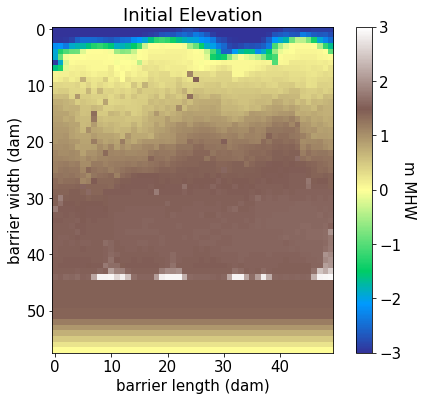

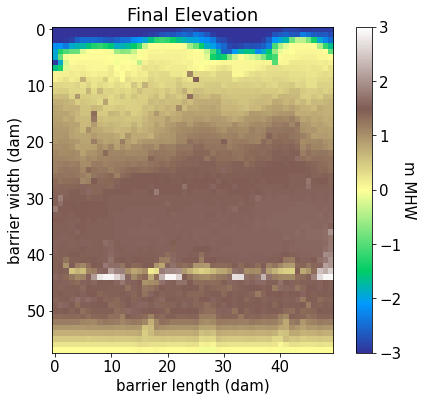

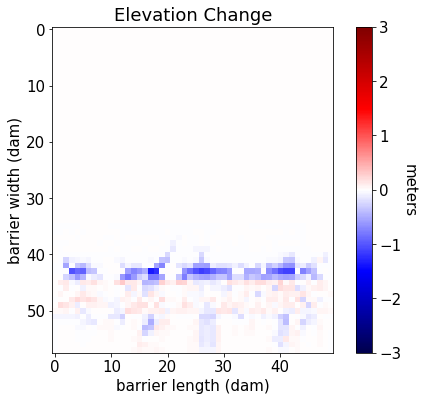

In [4]:
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams.update({"font.size": 15})

initial_domain = outwash._initial_full_domain
final_domain = outwash._full_domain
domain_change = final_domain-initial_domain

### ELEVATION PLOTS-------------------------------------------------------------------------------------------------------------
# plotting initial domain
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
mat = ax1.matshow(
    initial_domain*10,
    cmap="terrain",
    vmin=-3.0, vmax=3.0,
)
cbar = fig1.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
ax1.set_title("Initial Elevation")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()

# plotting post storm elevation
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
mat2 = ax2.matshow(
    final_domain[:, :]*10,
    cmap="terrain",
    vmin=-3.0, vmax=3.0,
)
ax2.set_xlabel('barrier length (dam)')
ax2.set_ylabel('barrier width (dam)')
ax2.set_title("Final Elevation")
plt.gca().xaxis.tick_bottom()
cbar = fig2.colorbar(mat2)
cbar.set_label('m MHW', rotation=270, labelpad=15)

# plotting domain elevation change
domain_change = final_domain - initial_domain
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
mat3 = ax3.matshow(
    domain_change*10,
    cmap="seismic",
    vmin=-3, vmax=3,
)
ax3.set_xlabel('barrier length (dam)')
ax3.set_ylabel('barrier width (dam)')
ax3.set_title("Elevation Change")
plt.gca().xaxis.tick_bottom()
cbar = fig3.colorbar(mat3)
cbar.set_label('meters', rotation=270, labelpad=15)

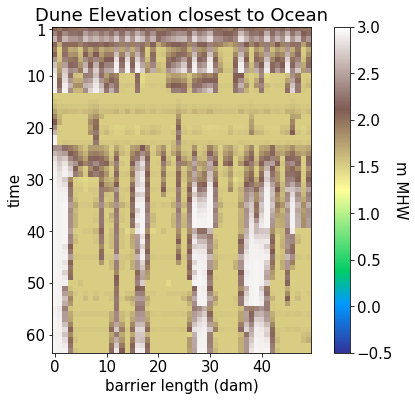

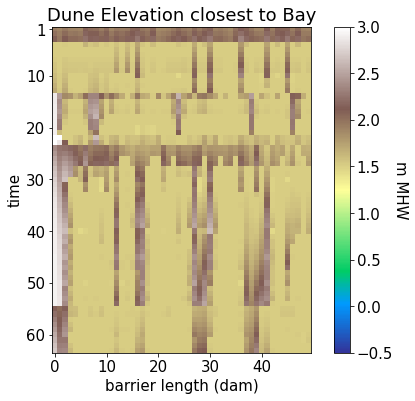

In [20]:
# dunes closest to ocean
dune_array = np.zeros([b3d._time_index-1, b3d._BarrierLength])
for t in range(1, 64):
    beach_dunes = b3d.DuneDomain[t]
    beach_dunes = np.transpose(beach_dunes) + b3d._BermEl
    beach_dunes = beach_dunes[0]
    dune_array[t-1] = beach_dunes
# print(dune_array)
fig = plt.figure()
ax = fig.add_subplot(111)
mat = ax.matshow(
#     np.flip(full_domain, 0)*10,
    dune_array*10,
    cmap="terrain",
    vmin=-0.5, vmax=3.0,
)
cbar = fig.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
ax.set_title("Dune Elevation closest to Ocean")
ax.set_ylabel("time")
ax.set_yticks([0,9,19,29,39,49,59])
labels=['1','10','20','30','40','50','60']
ax.set_yticklabels(labels)
ax.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()

# dunes closest to bay
dune_array = np.zeros([b3d._time_index-1, b3d._BarrierLength])
for t in range(1, 64):
    beach_dunes = b3d.DuneDomain[t]
    beach_dunes = np.transpose(beach_dunes) + b3d._BermEl
    beach_dunes = beach_dunes[1]
    dune_array[t-1] = beach_dunes
# print(dune_array)
fig = plt.figure()
ax = fig.add_subplot(111)
mat = ax.matshow(
#     np.flip(full_domain, 0)*10,
    dune_array*10,
    cmap="terrain",
    vmin=-0.5, vmax=3.0,
)
cbar = fig.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
ax.set_title("Dune Elevation closest to Bay")
ax.set_ylabel("time")
ax.set_yticks([0,9,19,29,39,49,59])
labels=['1','10','20','30','40','50','60']
ax.set_yticklabels(labels)
ax.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()

In [ ]:
# path = "D:/NC State/Outwasher/Output/newest_flow_routing/"
# runID = "100years_outwash10_substep20"
# newpath = path + runID + "/"
# if not os.path.exists(newpath):
#     os.makedirs(newpath)
# os.chdir(newpath)

plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams.update({"font.size": 15})

In [ ]:
initial_domain = outwash._initial_full_domain
final_domain = outwash._full_domain
domain_change = final_domain-initial_domain

### ELEVATION PLOTS-------------------------------------------------------------------------------------------------------------
# plotting initial domain
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
mat = ax1.matshow(
    initial_domain*10,
    cmap="terrain",
    vmin=-3.0, vmax=3.0,
)
cbar = fig1.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
ax1.set_title("Initial Elevation")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()
# fig1.savefig(newpath + "0_domain", facecolor='w')

# plotting post storm elevation
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
mat2 = ax2.matshow(
    final_domain[:, :]*10,
    cmap="terrain",
    vmin=-3.0, vmax=3.0,
)
ax2.set_xlabel('barrier length (dam)')
ax2.set_ylabel('barrier width (dam)')
ax2.set_title("Final Elevation")
plt.gca().xaxis.tick_bottom()
cbar = fig2.colorbar(mat2)
cbar.set_label('m MHW', rotation=270, labelpad=15)
# fig2.savefig(newpath + "final_domain", facecolor='w')

# plotting domain elevation change
domain_change = final_domain - initial_domain
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
mat3 = ax3.matshow(
    domain_change*10,
    cmap="seismic",
    vmin=-2, vmax=2,
)
ax3.set_xlabel('barrier length (dam)')
ax3.set_ylabel('barrier width (dam)')
ax3.set_title("Elevation Change")
plt.gca().xaxis.tick_bottom()
cbar = fig3.colorbar(mat3)
cbar.set_label('meters', rotation=270, labelpad=15)
# fig3.savefig(newpath + "elev_change_domain", facecolor='w')


In [ ]:
### HYDROGRAPH------------------------------------------------------------------------------------------------------------------
bay_levels = outwash._initial_bay_levels[0]
duration = len(bay_levels)
x = range(0, duration)

fig5 = plt.figure()
ax5 = fig5.add_subplot(111)
ax5.plot(x, bay_levels*10, label="hydrograph")
ax5.set_xlabel("storm duration (hours)")
ax5.set_ylabel("m MHW")
ax5.set_title("bay elevation over the course of each storm")
# ax5.legend(loc="lower right")
plt.show()
# fig5.savefig(newpath + "hydrograph", facecolor='w')
plt.close()

In [ ]:
m_xsTS = np.subtract(b3d.x_s_TS, b3d.x_s_TS[0])
m_xsTS = np.multiply(m_xsTS,10)

# B3D Only

In [ ]:
b3d2 = Barrier3d.from_yaml("C:/Users/Lexi/PycharmProjects/Barrier3d/tests/test_params/")
b3d2_interior = np.zeros(101)
for t in range(1, 21):
    b3d2.update()
    b3d2.update_dune_domain()  
    print('B3D time step: ', b3d2._time_index)


In [ ]:
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams.update({"font.size": 15})

m_xsTS2 = np.subtract(b3d2.x_s_TS, b3d2.x_s_TS[0])
m_xsTS2 = np.multiply(m_xsTS2,10)
plt.plot(m_xsTS2, label="B3D only")
plt.plot(m_xsTS, label="Washout to shoreface")
plt.vlines(years, ymin=min(m_xsTS), ymax=80, colors='k', linestyles='dotted', linewidth=1)
plt.xlabel("years")
plt.ylabel("shoreline position (m)")
plt.ylim([0, 80])
plt.legend()
# plt.title("Outwash to Shoreface")
# plt.savefig(r"D:\NC State\Outwasher\Output\newest_flow_routing/b3d_outwash10_shorelinechanges", facecolor='w')


# Outwash out of system

In [ ]:
b3d3 = Barrier3d.from_yaml("C:/Users/Lexi/PycharmProjects/Barrier3d/tests/test_params/")
years3 = np.load("C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/outwash_years10.npy")

for t in range(1, 21):
    b3d3.update()
    b3d3.update_dune_domain()
    if b3d3._time_index-1 in years3:
        outwash3 = Outwasher(
                datadir="C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/",
                outwash_years="outwash_years10.npy",
                outwash_bay_levels="outwash_baylevels10.npy",
                time_step_count=b3d3._TMAX,
                berm_elev=b3d3._BermEl,
                barrier_length=b3d3._BarrierLength,
                sea_level=b3d3._SL,
                bay_depth=-b3d3._BayDepth,
                interior_domain=b3d3.InteriorDomain,
                dune_domain=b3d3.DuneDomain[b3d3._time_index - 1],
                block_size = 5,
                substep=20,
                sediment_flux_coefficient_Cx=10,
                sediment_flux_coefficient_Ki=7.5E-3,  # b3d = 7.5E-6 for inundation
                max_slope=-0.25,
                shoreface_on=False)
        outwash3.update(b3d3)
    
    print('B3D time step: ', b3d3._time_index)

In [ ]:
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams.update({"font.size": 15})

initial_domain = outwash3._initial_full_domain
final_domain = outwash3._full_domain
domain_change = final_domain-initial_domain

### ELEVATION PLOTS-------------------------------------------------------------------------------------------------------------
# plotting initial domain
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
# fig1, (ax1, ax3) = plt.subplots(1, 2, sharey=True)
mat = ax1.matshow(
    initial_domain*10,
    cmap="terrain",
    vmin=-3.0, vmax=3.0,
)
cbar = fig1.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
ax1.set_title("Initial Elevation")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()
# fig1.savefig(newpath + "0_domain", facecolor='w')

# plotting post storm elevation
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
mat2 = ax2.matshow(
    final_domain[:, :]*10,
    cmap="terrain",
    vmin=-3.0, vmax=3.0,
)
ax2.set_xlabel('barrier length (dam)')
ax2.set_ylabel('barrier width (dam)')
ax2.set_title("Final Elevation")
plt.gca().xaxis.tick_bottom()
cbar = fig2.colorbar(mat2)
cbar.set_label('m MHW', rotation=270, labelpad=15)
# fig2.savefig(newpath + "final_domain", facecolor='w')

# plotting domain elevation change
domain_change = final_domain - initial_domain
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
mat3 = ax3.matshow(
    domain_change*10,
    cmap="seismic",
    vmin=-2, vmax=2,
)
ax3.set_xlabel('barrier length (dam)')
ax3.set_ylabel('barrier width (dam)')
ax3.set_title("Elevation Change")
plt.gca().xaxis.tick_bottom()
cbar = fig3.colorbar(mat3)
cbar.set_label('meters', rotation=270, labelpad=15)
# fig3.savefig(newpath + "elev_change_domain", facecolor='w')


In [ ]:
plt.rcParams['figure.figsize'] = (8,6)

m_xsTS3 = np.subtract(b3d3.x_s_TS,b3d3.x_s_TS[0])
m_xsTS3 = np.multiply(m_xsTS3,10)
# plt.vlines(years3-1, ymin=min(m_xsTS3), ymax=max(m_xsTS3), colors='r', linestyles='dotted')
plt.vlines(years3, ymin=min(m_xsTS3), ymax=80, colors='k', linestyles='dotted', linewidth=1)

plt.plot(m_xsTS2, label="B3D only")
plt.plot(m_xsTS, label="Washout to shoreface")
plt.plot(m_xsTS3, label="Washout lost")

plt.ylim([0,85])
plt.xlabel("years")
plt.ylabel("shoreline position (m)")
plt.legend()
# plt.savefig(r"D:\NC State\Outwasher\Output\newest_flow_routing\shoreface_nourishment_comparison_substep20.png", facecolor='w')

In [ ]:
OWTS = b3d.QowTS #m3/m
OWTS2 = b3d2.QowTS #m3/m
OWTS3 = b3d3.QowTS #m3/m

plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams.update({"font.size": 15})

plt.plot(OWTS2, label="B3D only")
plt.plot(OWTS, linestyle="dashed", label="Washout to shoreface")
# plt.plot(OWTS3, label="Outwash every 20 years")
# plt.vlines(years3-1, ymin=min(m_xsTS3), ymax=max(m_xsTS3), colors='r', linestyles='dotted')
# plt.vlines(years-1, ymin=min(m_xsTS), ymax=max(m_xsTS), colors='k', linestyles='dotted')
plt.xlabel("years")
plt.ylabel("overwash flux ($m^3/m$)")
plt.legend()
# plt.title("Outwash to Shoreface")
# plt.savefig(r"D:\NC State\Outwasher\Output\newest_flow_routing\overwash_comparison_substep20.png", facecolor='w')